In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## 0. Correlation of Discrete Signals

Correlation is a **measure** of how **similar** signals are

#### 0.1 Formula

$$ Corr_{x,y} = \sum_{n=0}^{N-1}x[n]\cdot y[n] $$

#### 0.2 Example

 $$ 1.\ x =[1, 3, -2, 4] $$

 $$ 2.\ y =[2, 3, -1, 3] $$

 $$ 3.\ z =[2, -1, 4, -2] $$

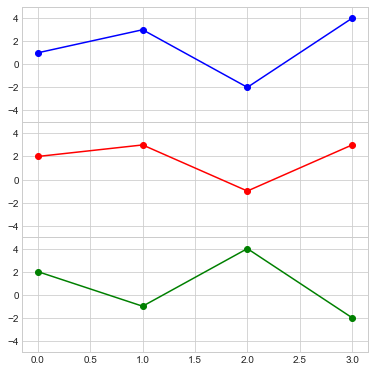

In [19]:
time = np.array([0, 1, 2, 3])
x = np.array([1,3,-2,4])
y = np.array([2,3,-1,3])
z = np.array([2, -1, 4, -2])

fig = plt.figure()

ax1 = fig.add_axes([2.0, 1.0, 0.8, 0.4], xticklabels=[], ylim=(-5, 5))
ax2 = fig.add_axes([2.0, 0.6, 0.8, 0.4], ylim=(-5, 5))
ax3 = fig.add_axes([2.0, 0.2, 0.8, 0.4], ylim=(-5, 5))


ax1.plot(time, x,'-ok', color='blue')
ax2.plot(time, y, '-ok',color ='red')
ax3.plot(time, z, '-ok',color ='green');

$$ Corr_{x,y} = x[0]y[0] + x[1]y[1] + x[2]y[2] + x[3]y[3]=(1)\cdot (2)+(3)\cdot (3)+(-2)\cdot (-1)+(4)\cdot (3)=25 $$

$$ Corr_{y,z} = y[0]z[0] + y[1]z[1] + y[2]z[2] + y[3]z[3]=(2)\cdot (2)+(3)\cdot (-1)+(-1)\cdot (4)+(3)\cdot (-2)=-9 $$


#### 0.3 Normalized Correlation

Consider if $$ z =[500, -1, 4, -2] $$
it seems $$ Corr_{x,y} < Corr_{y,z} $$

But this is not right. So we need to **normalized correlation**.

#### 0.4 Formula

$$ Corr\_norm_{x,y}=\frac{\sum_{n=0}^{N-1}x[n]\cdot y[n]}{\sqrt{\sum_{n=0}^{N-1}x^{2}[n]\cdot \sum_{n=0}^{N-1}y^{2}[n]}} $$ 

Suppose: $$ z =[2, -1, 4, -2] $$
$$ Corr_{x,y} = x[0]y[0] + x[1]y[1] + x[2]y[2] + x[3]y[3]=(1)\cdot (2)+(3)\cdot (3)+(-2)\cdot (-1)+(4)\cdot (3)=25 $$
$$ norm\_den_{x,y}=sqrt((1+9+3+16)(4+9+1+9)) = 26.27 $$
$$ norm\_cov_{x,y}=25/26.27 = 0.95 $$

$$ Corr_{y,z} = y[0]z[0] + y[1]z[1] + y[2]z[2] + y[3]z[3]=(2)\cdot (100)+(3)\cdot (-1)+(-1)\cdot (4)+(3)\cdot (-2)=187 $$
$$ norm\_den_{x,y}=sqrt((24)(10000+1+16+4)) = 490.41 $$
$$ norm\_cov_{x,y}=25/26.27 = 0.38 $$


## 1. Cross-correlation

#### 1.1 Definiation

**Cross-correlation** is the comparison of **two different time series** to detect if there is a **correlation** between metrics with the same maximum and minimum values. For example: “Are two audio signals in phase?”

#### 1.2 Formula

$$ G[i, j] = \sum_{u=-k}^{k}\sum_{v=-k}^{k}h[u, v]\cdot F[i+u, j+v] $$

$$ k: number\ of\ negihbor $$
$$ h[u,v]: weight $$

Notice: **From left to right** and **from top to bottom**

#### 1.3 Example

![title](img/crosscorrelation.jpg)

$$ G[3,3 ] = a*A+b*B+c*C+d*D+e*E+f*F+g*G+h*H+i*I $$

#### 1.4 Time-series supplemental materials
$$ R(i) = \int_{-\infty}^{-\infty}x(t)\cdot y(t+i)dt $$

Where
**x(t)** and **y(t)** is a function of time;

     i is the time delay. It can be negative, zero or positive;

     R is corss correlation, which is a function of the time delay i.

     When x(t) = y(t), cross correlation becomes auto correlation.

#### 1.5 Example

 $$ 1.\ x =[0.1,0.2,-0.1,4.1,-2,1.5,-0.1] $$
 $$ 2.\ y =[0.1,4,-2.2,1.6,0.1,0.1,0.2] $$

##### 1.5.1 0 time lag

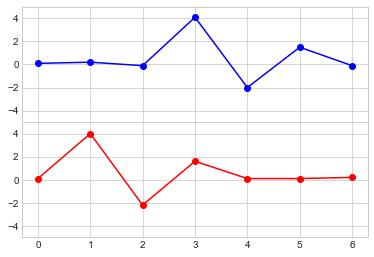

In [23]:
x = np.array([0.1,0.2,-0.1,4.1,-2,1.5,-0.1])
y = np.array([0.1,4,-2.2,1.6,0.1,0.1,0.2])
time = np.array([0, 1, 2, 3, 4, 5, 6])

fig = plt.figure()

ax1 = fig.add_axes([2.0, 1.0, 0.8, 0.4], xticklabels=[], ylim=(-5, 5))
ax2 = fig.add_axes([2.0, 0.6, 0.8, 0.4], ylim=(-5, 5))
ax1.plot(time, x,'-ok', color='blue')
ax2.plot(time, y, '-ok',color ='red');

$$ Correlation_{zero \ lag} = (0.1)\cdot (0.1)+(0.2)\cdot(0.4)+(-0.1)\cdot(-2.2)+(4.1)\cdot(1.6)+(-2)\cdot(0.1)+(1.5)\cdot(0.1)+(-0.1)\cdot(0.2) =7.52 $$

##### 1.5.2 1 time lag

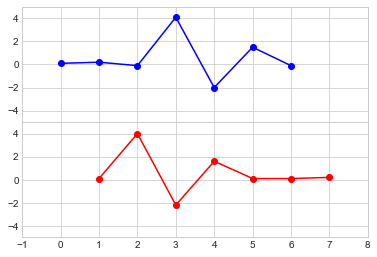

In [34]:
x = np.array([0.1,0.2,-0.1,4.1,-2,1.5,-0.1])
y = np.array([0.1,4,-2.2,1.6,0.1,0.1,0.2])
time = np.array([0, 1, 2, 3, 4, 5, 6])
fig = plt.figure()
ax1 = fig.add_axes([2.0, 1.0, 0.8, 0.4], xticklabels=[], ylim=(-5, 5), xlim =(-1,8))
ax2 = fig.add_axes([2.0, 0.6, 0.8, 0.4], ylim=(-5, 5), xlim =(-1,8))
ax1.plot(time, x,'-ok', color='blue')
ax2.plot(time+1, y, '-ok',color ='red');

$$ Correlation_{one \ lag} = (0.2)\cdot (0.1)+(-0.1)\cdot(4)+(4.1)\cdot(-2.2)+(-2)\cdot(1.6)+(1.5)\cdot(0.1)+(-0.1)\cdot(0.1) =-12.46 $$

##### 1.5.3 2 time lag

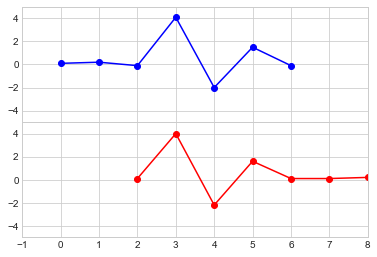

In [35]:
x = np.array([0.1,0.2,-0.1,4.1,-2,1.5,-0.1])
y = np.array([0.1,4,-2.2,1.6,0.1,0.1,0.2])
time = np.array([0, 1, 2, 3, 4, 5, 6])
fig = plt.figure()
ax1 = fig.add_axes([2.0, 1.0, 0.8, 0.4], xticklabels=[], ylim=(-5, 5), xlim =(-1,8))
ax2 = fig.add_axes([2.0, 0.6, 0.8, 0.4], ylim=(-5, 5), xlim =(-1,8))
ax1.plot(time, x,'-ok', color='blue')
ax2.plot(time+2, y, '-ok',color ='red');

$$ Correlation_{two \ lag} = (-0.1)\cdot(0.1)+(4.1)\cdot(4)+(-2)\cdot(-2.2)+(1.5)\cdot(1.6)+(-0.1)\cdot(0.1) =23.18 $$

##### 1.5.4 Result

$$ Correlation\_Sequence = [7.52, -12.46, 23.18, -11.05, 6.02, -0.25, -0.01] $$

#### 1.6 Python Library Calculation

In [48]:
x = np.array([0.1,0.2,-0.1,4.1,-2,1.5,-0.1])
y = np.array([0.1,4,-2.2,1.6,0.1,0.1,0.2])
np.correlate(x, y, "same")

array([  0.99,   0.1 ,   0.31,   7.52, -12.46,  23.18, -11.05])

In [115]:
from scipy import signal
x = np.array([0.1,0.2,-0.1,4.1,-2,1.5,-0.1])
y = np.array([0.1,4,-2.2,1.6,0.1,0.1,0.2])
corr = signal.correlate(x, y, mode ='same')
corr

array([  0.99,   0.1 ,   0.31,   7.52, -12.46,  23.18, -11.05])

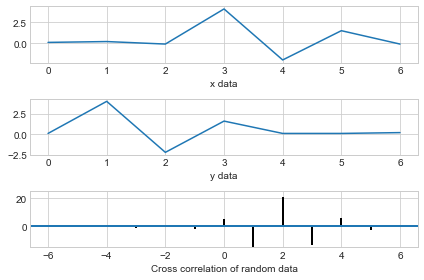

In [118]:
fig = plt.figure()
# Search trend volume
ax1 = fig.add_subplot(311)
ax1.plot(x)
ax1.set_xlabel('x data')

total = sum(x)
av = total / len(x)
z = [i - av for i in x]

# Random: "search trend volume"
ax2 = fig.add_subplot(312)
ax2.plot(y)
ax2.set_xlabel('y data')

total1 = sum(y)
av1 = total1 / len(y)
z1 = [i - av1 for i in y]

# Is there a pattern in search trend for this keyword?
ax3 = fig.add_subplot(313)
ax3.set_xlabel('Cross correlation of random data')
ax3.xcorr(z, z1, usevlines=True, maxlags=None, normed=False, lw=2)
ax3.grid(True)
plt.ylim(-15, 25)
plt.tight_layout()
plt.show();

## 2 Normalized cross-correlation 

 The **comparison** of **two time series**, but using **a different scoring result**. Instead of simple cross-correlation, it can compare metrics with **different value ranges**.

$$ NCC =\frac{\sum_{i=1}^{MN}x_{i}y_{i}}{\sqrt{\sum_{i=1}^{MN}x_{i}^{2}\cdot\sum_{i=1}^{MN}y_{i}^{2} }} $$

#### 2.1 Example 

In [119]:

x = np.array([1.0,2.0,3.0])
y = np.array([1.0,2.0,3.0])
from obspy.signal.cross_correlation import correlate
correlate(x,y,shift=2,normalize=True, demean=False)


array([ 0.21428571,  0.57142857,  1.        ,  0.57142857,  0.21428571])

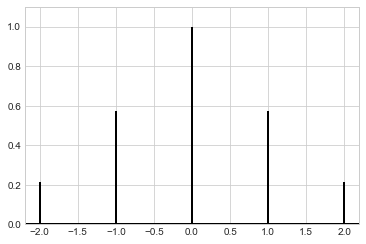

In [123]:
x = np.array([1.0,2.0,3.0])
y = np.array([1.0,2.0,3.0])
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.xcorr(x, y, usevlines=True, maxlags=2, normed=True, lw=2)
ax1.grid(True)
ax1.set_ylim(0, 1.1)
ax1.axhline(0, color='black', lw=2)
plt.show();

#### 2.2 Zero-mean Normalized Cross-Correlation

$$ ZNCC =\frac{\sum_{i=1}^{MN}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{MN}(x_{i}-\bar{x})^{2}\cdot\sum_{i=1}^{MN}(y_{i}-\bar{y})^{2} }} $$

where **x̄**  and **ȳ** are the **mean intensity values**.

In [128]:
x = np.array([1.0,2.0,3.0])
y = np.array([1.0,1.0,2.0])
from obspy.signal.cross_correlation import correlate
result = correlate(x,y,shift=2,normalize=True, demean=True)
result

array([-0.57735027,  0.28867513,  0.8660254 , -0.28867513, -0.28867513])

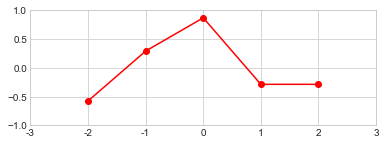

In [135]:
x = np.array([-2,-1,0,1,2])
y = result
fig = plt.figure()
ax1 = fig.add_axes([2.0, 1.0, 0.8, 0.4], xticklabels=[-3,-2,-1,0,1,2,3], ylim=(-1, 1), xlim =(-3,3))
ax1.plot(x, y, '-ok',color ='red');

#### 2.3 Auto-correlation

The **comparison** of a **time series** with itself at a **different time**. It aims, for example, to **detect repeating patterns or seasonality**. For example: “Is there weekly seasonality on a server website?” “Does the current week’s data highly correlate with that of the previous week?”

You can see the example from **Normalized cross-correlation**.

[scipy.signal.correlate](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate.html)

## 3. Convolution

#### 3.1 Formula

$$ G[i,j]=\sum_{v=-k}^{k}\sum_{v=-k}^{k}h[u,v]\cdot F[i-u,j-v] $$
Denoted by:   $$ G = h*F $$

[Convolution](https://zh.wikipedia.org/wiki/%E5%8D%B7%E7%A7%AF)


[ocn_data_analysis](https://currents.soest.hawaii.edu/ocn_data_analysis/_static/SEM_EDOF.html)

[relate material](https://currents.soest.hawaii.edu/ocn_data_analysis/_static/SEM_EDOF.html)

**Flip fliter** in both dimensions

    1) Bottom to Top
    2) Right to Left
Then apply **cross-correlation**

![title](img/convolution.jpg)

#### 3.2 1-D Formula

$$ y(t)=\int_{-\infty}^{+\infty}x(\imath )h(t-\imath )d\imath = \int_{-\infty}^{+\infty}h(\imath )x(t-\imath )d\imath $$

#### 3.3 Cross-correlation vs Convolution

![title](img/compare_1.jpg)
![title](img/compare_2.jpg)
![title](img/compare_3.jpg)
![title](img/compare_4.jpg)
![title](img/compare_5.jpg)
![title](img/compare_6.jpg)
![title](img/compare_7.jpg)

#### 3.4 Properties of Convolution

1) Linear and Shift Invariants

    Behaves the same everywhere(i.e., the value of the output depends on the pattern in the image neighborhood, not the position of the neigborhood)
    
2) Commutative $$ F*G=G*F $$

3) Associative $$ (F*G)*H=F*(G*H) $$

4) Identity: Unit Impulse
    E=[....0, 0, 1, 0, 0,....],
    
    F*E=F
    
5) Separable
    If the filter is separable, convolve all rows, then convolve all columns

#### 3.5 Demo Code

In [137]:
# Note how the convolution operator flips the second array before “sliding” the two across one another:
print(np.convolve([1, 2, 3], [0, 1, 0.5]))

# Only return the middle values of the convolution. Contains boundary effects, where zeros are taken into account:
print(np.convolve([1,2,3],[0,1,0.5], 'same'))

# The two arrays are of the same length, so there is only one position where they completely overlap:
print(np.convolve([1,2,3],[0,1,0.5], 'valid'))


[ 0.   1.   2.5  4.   1.5]
[ 1.   2.5  4. ]
[ 2.5]
